In [1]:
from cell_utils import *
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('ticks') 
%matplotlib inline
%config InlineBackend.figure_format='retina'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Importing experimental switching distribution data

In [2]:
path = '../Source_data/MM/YFP/sw_data_YD.csv'
init_df = pd.read_csv(path)
trans_list = [init_df[str(i)].dropna().to_numpy() for i in range(1,71)]
inter_list = []
for n in range(0,len(trans_list)):
    inter = np.diff(trans_list[n])
    inter_list.append(inter)

to_yellow_l = []
to_blue_l = []

for cell in inter_list:
    for i in range(0,len(cell)):
        if i%2 == 0:
            to_blue_l.append(cell[i])
        else:
            to_yellow_l.append(cell[i])

to_yellow = np.array(to_yellow_l)
to_blue = np.array(to_blue_l)

### Varying impact of simulation time on sampled distribution

In [3]:
output_list = []
pop=5000
seed = np.array([0.0075,0.9925])*(pop-1)
seed = seed.astype(int)
# manually collected switching rates
guess = [0.0057,0.057]
# 22 hr
output = run_sim(pop_seed=seed,max_pop=pop,n_divs=131,trans_kwargs=guess,spawn_kwargs=[1,])
output_list.append(output)
# 48 hr
output = run_sim(pop_seed=seed,max_pop=pop,n_divs=288,trans_kwargs=guess,spawn_kwargs=[1,])
output_list.append(output)
# 192 hr
output = run_sim(pop_seed=seed,max_pop=pop,n_divs=1152,trans_kwargs=guess,spawn_kwargs=[1,])
output_list.append(output)
# 768 hr 
output = run_sim(pop_seed=seed,max_pop=pop,n_divs=4608,trans_kwargs=guess,spawn_kwargs=[1,])
output_list.append(output)

100%|██████████| 4608/4608 [06:59<00:00, 10.98it/s]


### Plotting together with experimental data

True residence time parameter is 1754.3859649122805 minutes
With an observation time of 22 hrs, the average residence time (observed) is 484.0 minutes
With an observation time of 48 hrs, the average residence time (observed) is 857.0 minutes
With an observation time of 192 hrs, the average residence time (observed) is 1498.0 minutes
With an observation time of 768 hrs, the average residence time (observed) is 1686.0 minutes


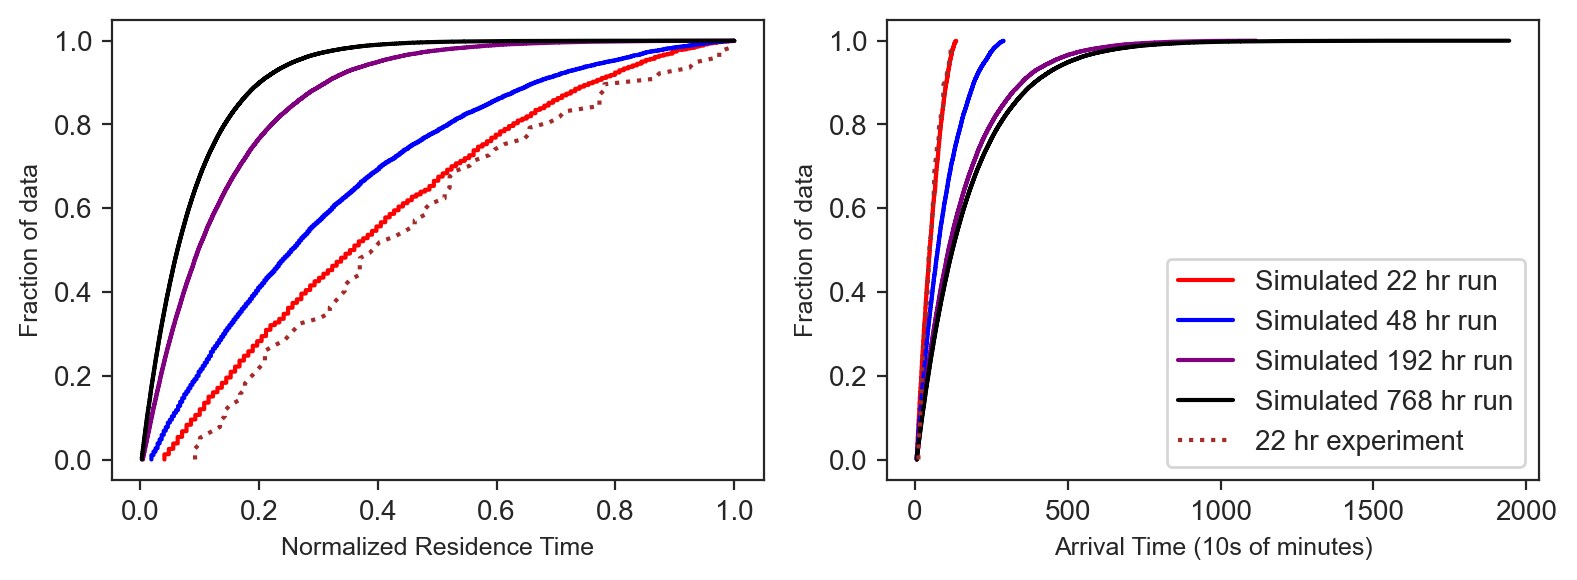

In [6]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
labels = [22,48,192,768]
colors = ["red","blue","purple","black",]
# offset accounts for delay during switching process
offset=4.5
print(f'True residence time parameter is {1*10/guess[0]} minutes')
for i,test_dataset in enumerate(output_list):
    at_yellow,at_blue =[],[]
    for cell in test_dataset.running_list:
        for residence in cell.arrival_times:
            if residence[0] =='to blue':
                at_blue.append(residence[1])
            elif residence[0] =='to yellow':
                at_yellow.append(residence[1])

    at_yellow = np.array(sorted(at_yellow))
    at_blue = np.array(sorted(at_blue))
    print(f'With an observation time of {labels[i]} hrs, the average residence time (observed) is {np.round(10*at_blue.mean())} minutes')

    # plotting simulations
    ax[0].plot(np.sort(offset+at_blue)/np.max(offset+at_blue), np.linspace(0, 1, len(at_blue), endpoint=False),
            label=f"Simulated {str(labels[i])} hr run",color=colors[i])
    
    ax[1].plot(np.sort(offset+at_blue), np.linspace(0, 1, len(at_blue), endpoint=False),
            label=f"Simulated {str(labels[i])} hr run",color=colors[i])
    
# plotting experimental dataset    
ax[0].plot(np.sort(to_blue)/np.max(to_blue), np.linspace(0, 1, len(to_blue), endpoint=False),
            label='22 hr experiment',color='brown',ls=':')

ax[1].plot(np.sort(to_blue), np.linspace(0, 1, len(to_blue), endpoint=False),
            label='22 hr experiment',color='brown',ls=':')



ax[0].set_xlabel('Normalized Residence Time',size=9)
ax[0].set_ylabel('Fraction of data',size=9)

ax[1].set_xlabel('Arrival Time (10s of minutes)',size=9)
ax[1].set_ylabel('Fraction of data',size=9)

plt.tight_layout()
plt.legend()
    

Initial Parameter is 172.41379310344826 minutes
With an observation time of 22 hrs, the average residence time (observed) is 155.0 minutes
With an observation time of 48 hrs, the average residence time (observed) is 167.0 minutes
With an observation time of 192 hrs, the average residence time (observed) is 171.0 minutes
With an observation time of 768 hrs, the average residence time (observed) is 174.0 minutes


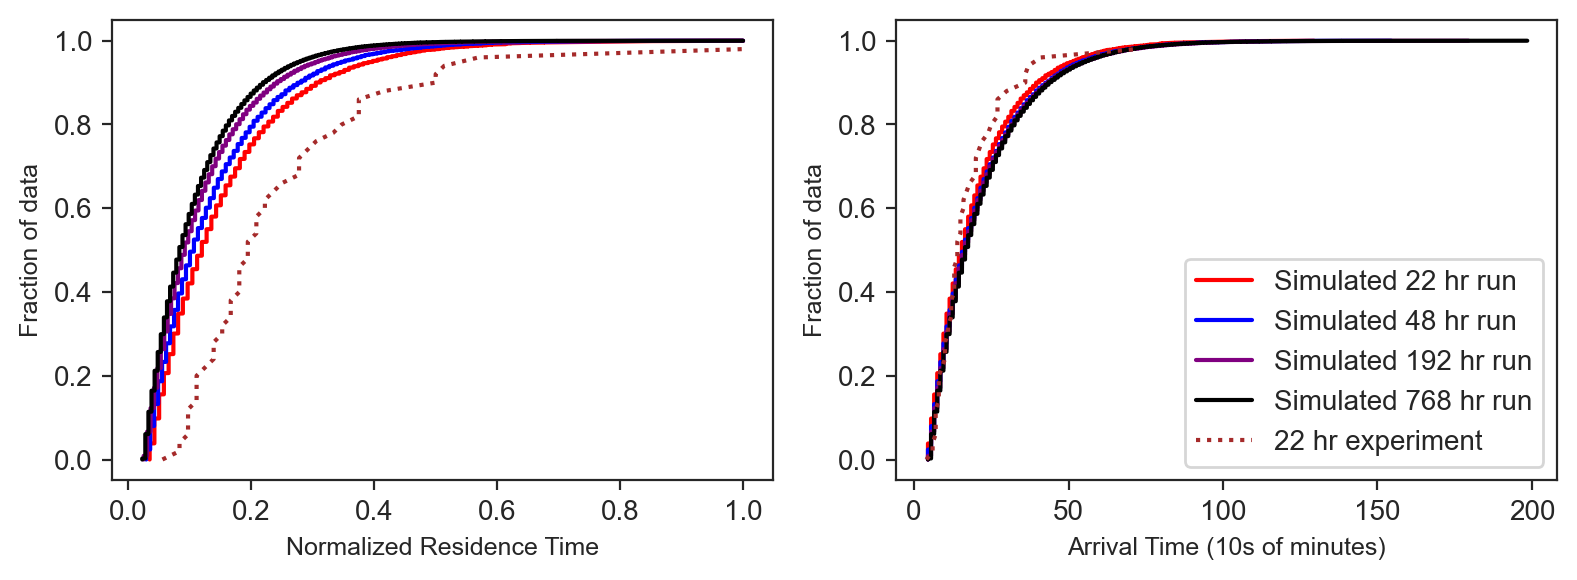

In [7]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
labels = [22,48,192,768]
colors = ["red","blue","purple","black",]
offset=4.5
print(f'Initial Parameter is {10*1/0.058} minutes')

for i,test_dataset in enumerate(output_list):
    at_yellow,at_blue =[],[]
    for cell in test_dataset.running_list:
        for residence in cell.arrival_times:
            if residence[0] =='to blue':
                at_blue.append(residence[1])
            elif residence[0] =='to yellow':
                at_yellow.append(residence[1])

    at_yellow = np.array(sorted(at_yellow))
    at_blue = np.array(sorted(at_blue))
    print(f'With an observation time of {labels[i]} hrs, the average residence time (observed) is {np.round(10*at_yellow.mean())} minutes')


    ax[0].plot(np.sort(offset+at_yellow)/np.max(offset+at_yellow), np.linspace(0, 1, len(at_yellow), endpoint=False),
            label=f"Simulated {str(labels[i])} hr run",color=colors[i])
    
    ax[1].plot(np.sort(offset+at_yellow), np.linspace(0, 1, len(at_yellow), endpoint=False),
            label=f"Simulated {str(labels[i])} hr run",color=colors[i])
    
    
ax[0].plot(np.sort(to_yellow)/np.max(to_yellow), np.linspace(0, 1, len(to_yellow), endpoint=False),
            label='22 hr experiment',color='brown',ls=':')

ax[1].plot(np.sort(to_yellow), np.linspace(0, 1, len(to_yellow), endpoint=False),
            label='22 hr experiment',color='brown',ls=':')



ax[0].set_xlabel('Normalized Residence Time',size=9)
ax[0].set_ylabel('Fraction of data',size=9)

ax[1].set_xlabel('Arrival Time (10s of minutes)',size=9)
ax[1].set_ylabel('Fraction of data',size=9)
plt.tight_layout()
plt.legend()
    